# Main file where where simulation is run

In [1]:
## here load all the dependencies and files needed
%run loadpackagesandfiles.ipynb


In [2]:
## here create a graph of the loaded data, 
##note this gives access to variable FG which is the (directed) graph displayed below 
## (if it is not shown the plot can be activated by uncommenting in buildgraph.ipynb file)
%run buildgraph.ipynb
print(get_closed(143))
print(get_lock(173,172))
print(get_bridge(340))

found restriction 8.7
True
None
True


In [3]:
'''
# loop over edges with data and check voorwaarden
for edge in FG.edges(data=True):
    if edge[2]['dis'] > 285 and edge[2]['dis'] < 290:
        print(edge)

# same for nodes
for node in FG.nodes(data=True):
    if node[0] == 209:
        print(node)
    if node[0] == 208:
        print(node)    
'''

"\n# loop over edges with data and check voorwaarden\nfor edge in FG.edges(data=True):\n    if edge[2]['dis'] > 285 and edge[2]['dis'] < 290:\n        print(edge)\n\n# same for nodes\nfor node in FG.nodes(data=True):\n    if node[0] == 209:\n        print(node)\n    if node[0] == 208:\n        print(node)    \n"

In [4]:
## obtain the paths possible sorted by length 
## (these paths are classes containing node keys and path lengths (in meter?))
%run get_paths.ipynb

## below you see the data that is contained in a path

In [5]:
print(len(ordered_paths))
print(ordered_paths[2])
#ordered_paths[8].plot(FG, save=True)

54
from node 41 to  node 263, covering distance: 54026.042993798714, closed:True, max height: 99


In [6]:
%run vessels.ipynb

In [7]:
list_with_vessels = init_vessels([M8,M8_high, M8_loaded_low, M8_loaded], ordered_paths)

#new
#list_with_vesselsM1 = init_vessels([M1, M1_loaded], ordered_paths)

In [8]:
def start(env, vessel):
    while True:
        vessel.log_entry("Start sailing", env.now, "", vessel.geometry)
        yield from vessel.move()
        vessel.log_entry("Stop sailing", env.now, "", vessel.geometry)
        if vessel.geometry == nx.get_node_attributes(FG, "geometry")[vessel.route[-1]]:
            break

In [9]:
# Add graph to environment
env.FG = FG

for i, vessel in enumerate(list_with_vessels):
    # Add environment and path to the vessel
    vessel.env = env
    vessel.geometry = nx.get_node_attributes(FG, "geometry")[vessel.route[0]]
    # Add the movements of the vessel to the simulation
    env.process(start(env, vessel))

env.epoch = datetime.datetime.now()

env.run()




In [10]:
vessel_log = pd.DataFrame.from_dict(list_with_vessels[0].log)
print(vessel_log.to_string())


                                     Message     Timestamp Value                      Geometry
0                              Start sailing      0.000000        POINT (4.4027792 51.6880539)
1    Sailing from node 263 to node 264 start      0.000000     0  POINT (4.4027792 51.6880539)
2    Sailing from node 263 to node 264 start     49.172325     0  POINT (4.4000023 51.6864487)
3    Sailing from node 264 to node 248 start     49.172325     0  POINT (4.4000023 51.6864487)
4    Sailing from node 264 to node 248 start     93.525441     0  POINT (4.3985059 51.6845369)
5    Sailing from node 248 to node 174 start     93.525441     0  POINT (4.3985059 51.6845369)
6    Sailing from node 248 to node 174 start    253.695318     0  POINT (4.3893096 51.6794118)
7    Sailing from node 174 to node 171 start    253.695318     0  POINT (4.3893096 51.6794118)
8    Sailing from node 174 to node 171 start    276.151799     0   POINT (4.3883543 51.678514)
9    Sailing from node 171 to node 173 start    27

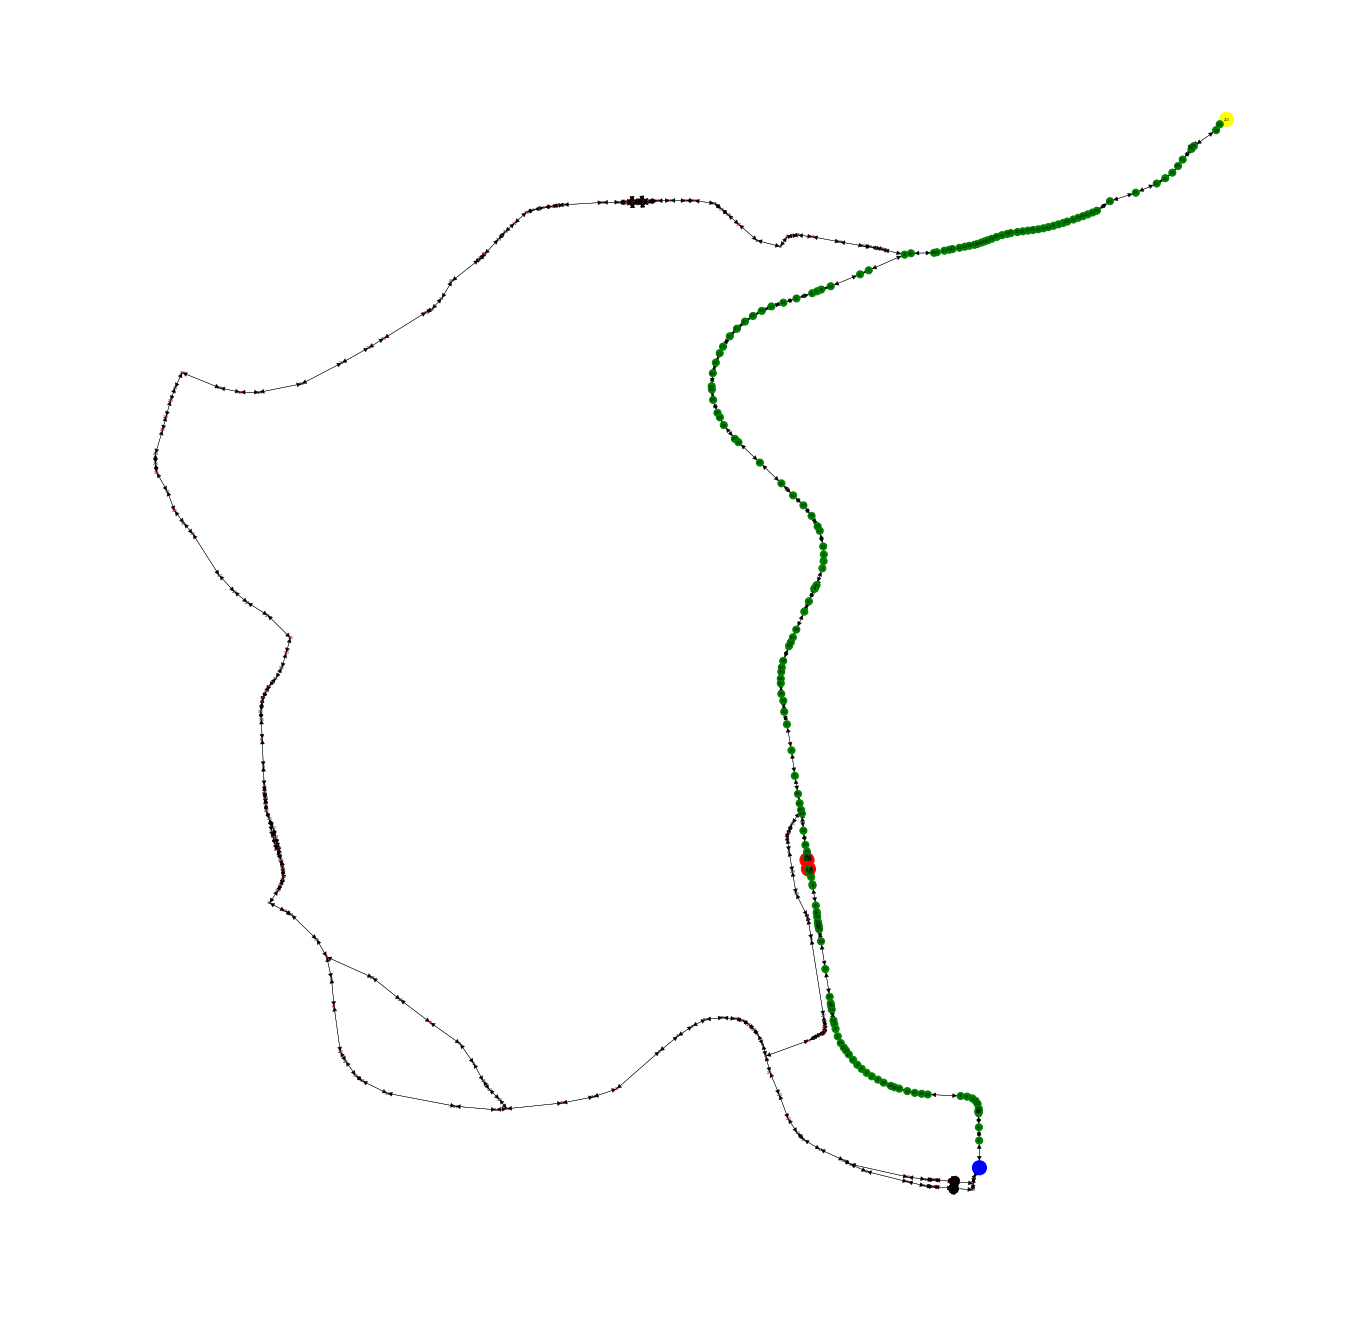

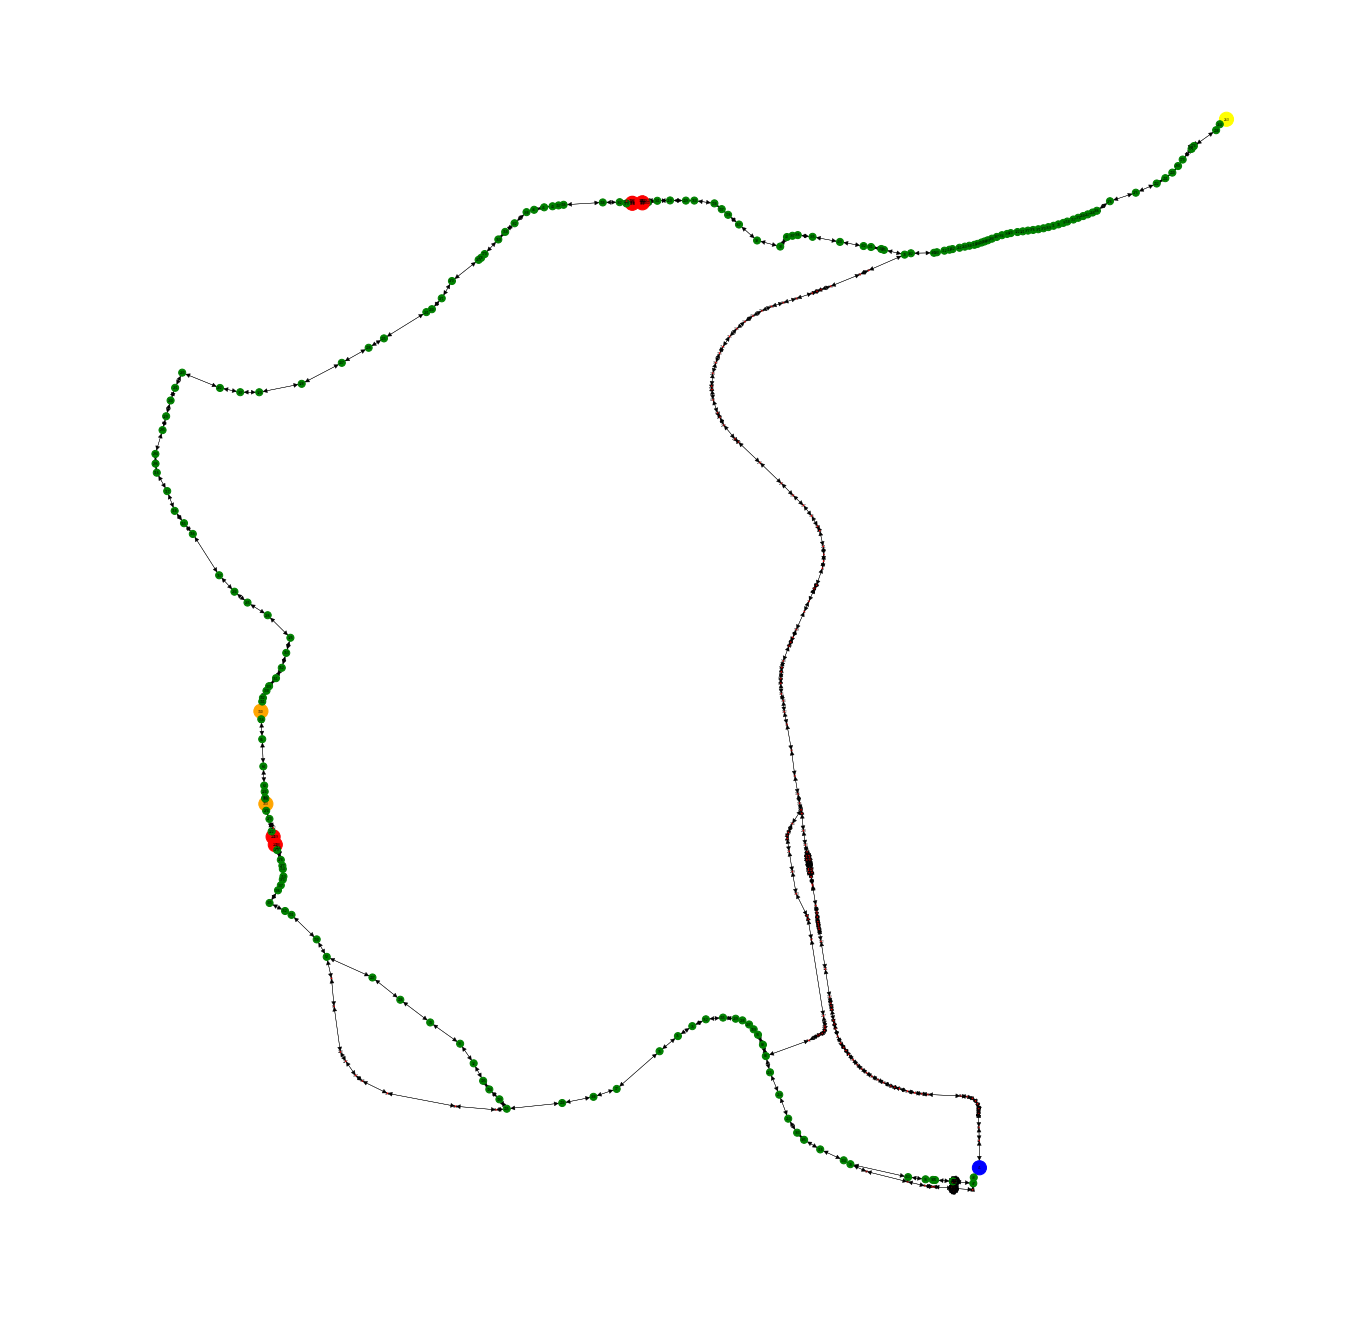

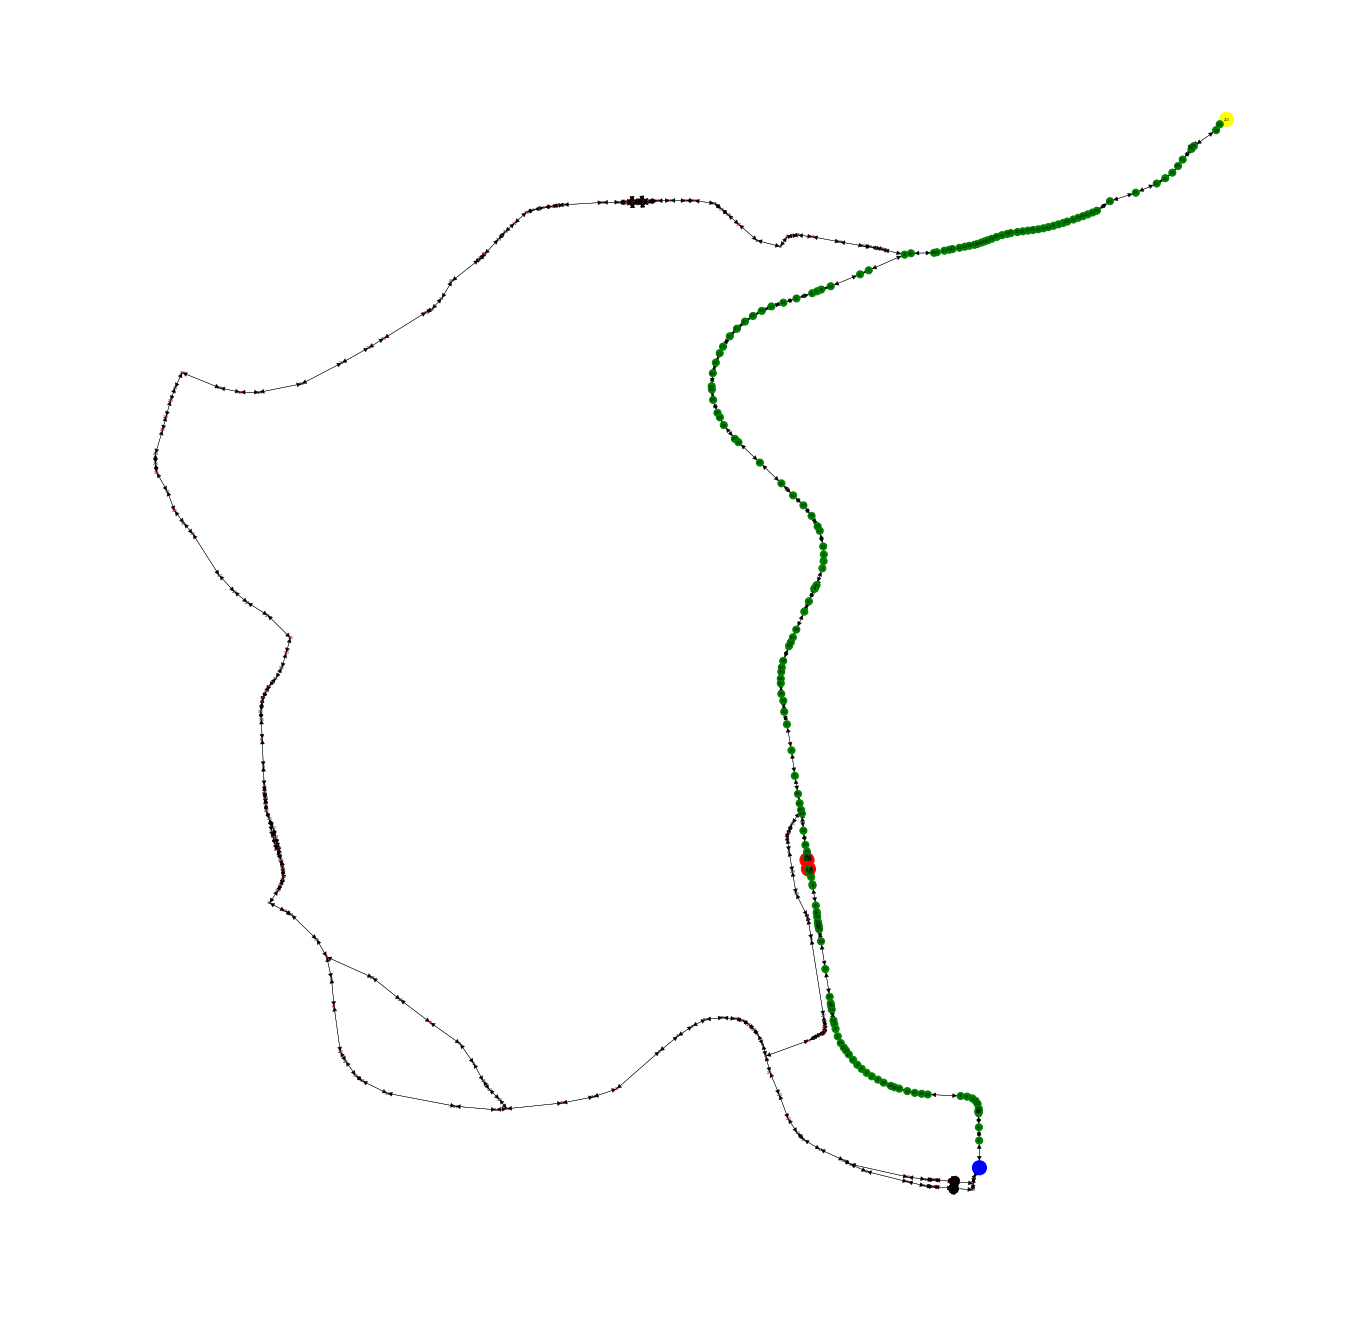

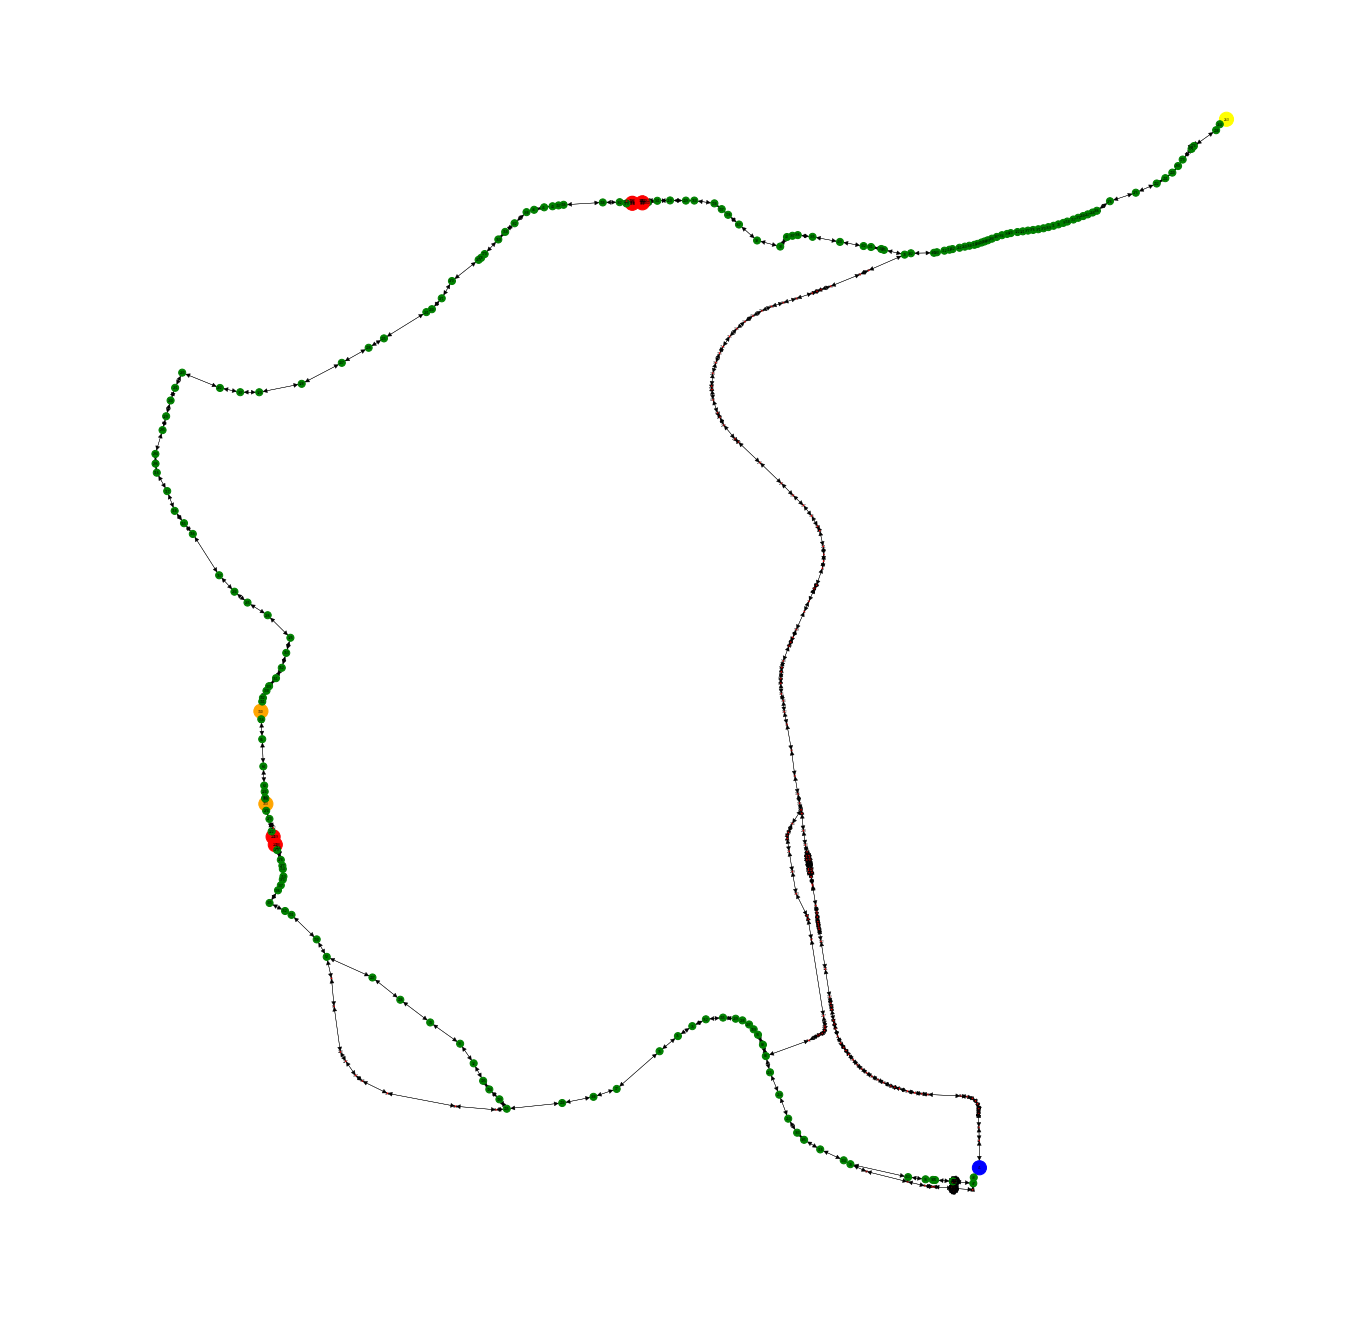

In [11]:
for vessel in list_with_vessels:
    vessel.path_complete.plot(FG, True, vessel.name)

In [12]:
energy_usage_total = []
energy_usage_stationary = []
for vessel in list_with_vessels:
    energy = vessel.calculate_energy_consumption()
    energy_usage_total.append(energy['total_energy'])
    energy_usage_stationary.append(energy['stationary'])
    print(energy, vessel.path_complete.length)
    



{'total_energy': 7199424035.456687, 'stationary': 94503345.3504} 50509.6454830062
{'total_energy': 12697737579.818874, 'stationary': 236258363.37600002} 84567.37980081535
{'total_energy': 13870168444.058517, 'stationary': 332978128.42679995} 50509.6454830062
{'total_energy': 22707773406.96637, 'stationary': 506705847.60599965} 84567.37980081535


Text(0.5, 1.0, 'M8 routes')

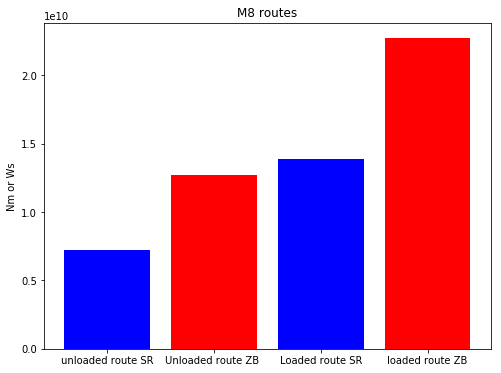

In [13]:
plt.figure(figsize=(8,6))
plt.bar([1,2,3,4], energy_usage_total, color=['b', 'r', 'b', 'r'], tick_label=['unloaded route SR','Unloaded route ZB ','Loaded route SR','loaded route ZB'])
plt.ylabel('Nm or Ws')
plt.title('M8 routes')

#plt.figure(figsize=(8,6))
#plt.bar([5], energy_usage_total, color=['r'], tick_label=['unloaded route SR'])
#plt.ylabel('Nm or Ws')
#plt.title('M8 routes')

0
1
2
3


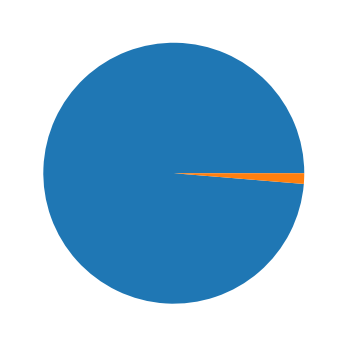

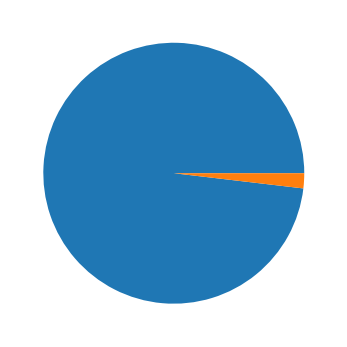

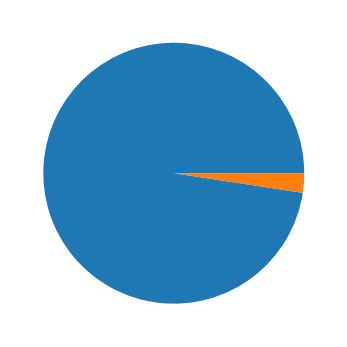

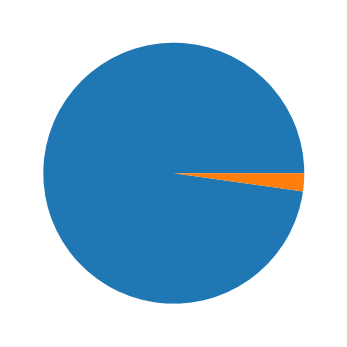

In [14]:
for i in range(len(energy_usage_total)):
    print(i)
    plt.figure(figsize=(6,6))
    plt.pie([ energy_usage_total[i]-energy_usage_stationary[i], energy_usage_stationary[i] ])
    plt.savefig('img/piechart_m8' + str(i) +'.png')